In [1]:
import networkit as nk
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt
import copy
import greedy_core as ga

## Introduction

In this notebook we give an example of how to use greedy algorothm to solve the integer traffic assignment problem (ITAP).


In this example we apply the greedy algorithm to the case of a random regular graph with origin-destination pairs picked uniformly at random (but with the constraint of the origin being distinct from the destination)

### Auxiliary functions
Stuff for plotting

In [2]:
#auxiliary functions to plot the network and the paths
def Plot_network(G): 
    to_plot_graph = nx.Graph()
    N=G.numberOfNodes()
    print(G.numberOfNodes())
    for i in range(N):
        to_plot_graph.add_node(i)
    for u,v in G.iterEdges():
        to_plot_graph.add_edge(u,v)

    weights = [(G.weight(u,v)) for u,v in G.iterEdges()]
    pos= nx.circular_layout(to_plot_graph)
    nx.draw(to_plot_graph,with_labels=True ,width = weights,pos=pos)
    plt.show()


def Plot_network_paths(G, paths): 
    N=G.numberOfNodes()
    G=copy.deepcopy(G) 
    for u,v in G.iterEdges():
        G.setWeight(u,v,1)
    for path in paths:
        for k in range(len(path)-1):
            G.setWeight(path[k],path[k+1],G.weight(path[k],path[k+1])+1)
    to_plot_graph = nx.Graph()
    for i in range(N):
        to_plot_graph.add_node(i)
    for u,v in G.iterEdges():
        to_plot_graph.add_edge(u,v,weight=(G.weight(u,v)))
        
    weights = np.log(np.array([(G.weight(u,v)) for u,v in G.iterEdges()])) #removing the logarithm will givethe whle graph, with thicker edges being those that get traversed the most.
    pos= nx.circular_layout(to_plot_graph)
    nx.draw(to_plot_graph,with_labels=True ,pos=pos,width=weights)
    plt.show()

## Graph generation
Generate the graph using the random regualr graph generator from networkx, then convert it into a networkit graph.

30


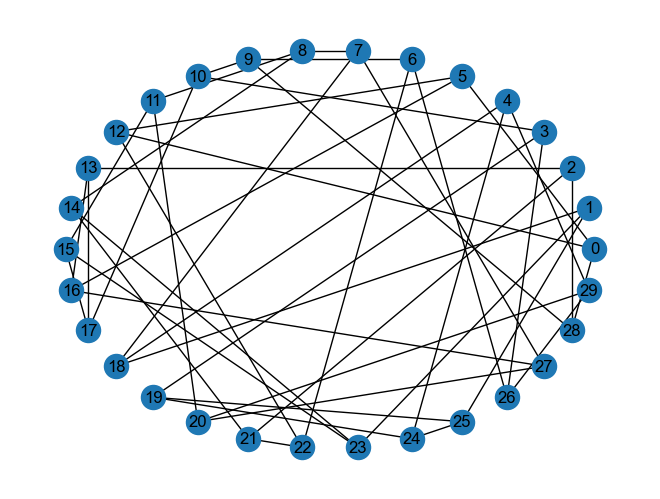

In [3]:
#generate random regular graph
N=30 #number of nodes
degree=3 #degree of each node
nx_G=nx.random_regular_graph(d=degree, n=N,seed=1) #generate using networkx library

# To convert my networkx into networkit
G = nk.Graph(n=N, weighted=True, directed=False)
for edge in nx_G.edges():
    G.addEdge(edge[0],edge[1]) 
    G.setWeight(edge[0],edge[1],1)

#plot the graph
if(N<=50 and degree<30):
    Plot_network(G)

## Generate origin destination pairs
A total of $M$ pairs is generated by picking each time two random distinct nodes in the graph

In [4]:
#generate random sources and destinations
M=60 #number of paths
start_nodes=[]
end_nodes=[]
for i in range(M):
    start_node,end_node=np.random.choice(N,2,replace=False)    
    start_nodes.append(start_node)
    end_nodes.append(end_node)


print("The sources are : ")
print(start_nodes)
print("The destinations are : ")
print(end_nodes)

#transform G into an undirected weighted graph
G = nk.graphtools.toWeighted(G)  #maybe check if weights on nodes

#------------------------------------------------------------------------------------------------------------------------------------ 
#cost function: when computing the total cost you will just use :phi(flow)
def phi(x,gamma):
    return x**(gamma)

The sources are : 
[16, 22, 25, 20, 29, 27, 15, 17, 14, 2, 6, 10, 9, 2, 1, 1, 24, 24, 29, 20, 16, 16, 15, 8, 25, 16, 29, 17, 23, 13, 4, 6, 5, 28, 17, 8, 29, 3, 17, 28, 7, 18, 23, 27, 29, 0, 9, 14, 11, 10, 23, 5, 24, 11, 9, 3, 5, 18, 14, 25]
The destinations are : 
[22, 18, 8, 18, 22, 10, 26, 25, 7, 7, 23, 3, 22, 22, 11, 8, 29, 0, 3, 1, 11, 25, 13, 3, 15, 12, 26, 7, 22, 3, 2, 22, 22, 21, 25, 5, 27, 7, 9, 26, 8, 6, 8, 3, 10, 23, 28, 26, 7, 29, 21, 20, 7, 17, 5, 12, 23, 25, 2, 7]


# Greedy Routing


In [5]:
gamma=2#parameter of the cost function
greedy_paths,flag_conv=ga.greedy_optimizer(G,start_nodes,end_nodes,phi=lambda x: phi(x,gamma),max_steps=50,quiet=False, init_paths=None)
if flag_conv:
    print("The algorithm converged")

t=0 energy=1027.0
t=1 energy=933.0
t=2 energy=918.0
t=3 energy=912.0
The algorithm converged


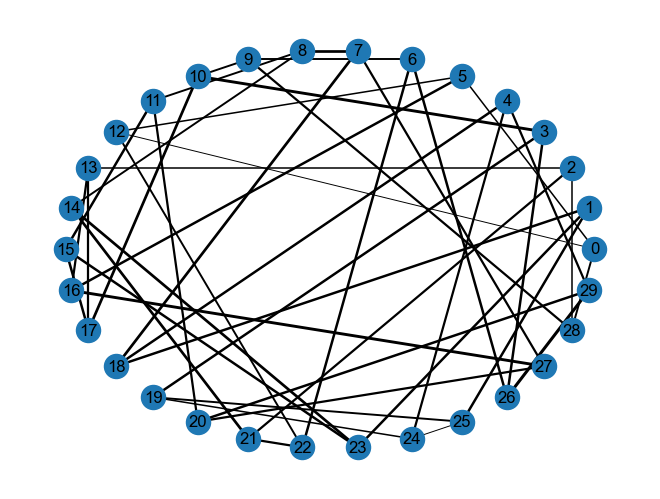

In [6]:
#plotting the flow (traffic) on the edges of the network
Plot_network_paths(G, greedy_paths)